#Image Classification with CNN Transfer Learning

#1.) IMAGE & MODEL PREPARATION

Load Base Model and Add New Layers

In [ ]:
from tensorflow.keras.applications import InceptionV3

base_model= InceptionV3(weights='imagenet',include_top=False)

87924736/87910968 [==============================] - 1s 0us/step


In [ ]:
from keras.layers import Dense,GlobalAveragePooling2D

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(512,activation='relu')(x)
x=Dense(256,activation='relu')(x)
preds=Dense(5,activation='softmax')(x)

In [ ]:
from tensorflow.keras import Model

model= Model(inputs=base_model.input,outputs=preds)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d (Conv2D)                (None, None, None,   864         ['input_1[0][0]']                
                                32)                                                               
                                                                                                  
 batch_normalization (BatchNorm  (None, None, None,   96         ['conv2d[0][0]']                 
 alization)                     32)                                                           

In [ ]:
trainablelayer = 40
for layer in model.layers[:trainablelayer]:
  layer.trainable=False
for layer in model.layers[trainablelayer:]:
  layer.trainable=True

print(len(model.layers))
model.summary()

315
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d (Conv2D)                (None, None, None,   864         ['input_1[0][0]']                
                                32)                                                               
                                                                                                  
 batch_normalization (BatchNorm  (None, None, None,   96         ['conv2d[0][0]']                 
 alization)                     32)                                                       

Create ImageDataGenerator (Train, Validation)

In [1]:
from keras.preprocessing.image import ImageDataGenerator

In [2]:
rotation_range = 30
width_shift_range = [0.1, 0.2, 0.3]
height_shift_range = [0.1, 0.2, 0.3]
shear_range = 0.3
zoom_range = 0.2
horizontal_flip = True

In [3]:
datagen=ImageDataGenerator( rescale=1./255,
                            rotation_range=rotation_range,
                            zoom_range=zoom_range,
                            width_shift_range=width_shift_range, 
                            height_shift_range=height_shift_range,
                            shear_range=shear_range, 
                            horizontal_flip=horizontal_flip,
                            fill_mode="nearest")
seed_value = 20

Data Preprocessing

In [4]:
image_classification_train = datagen.flow_from_directory('/content/drive/MyDrive/ColabNotebooks/Image_processing/imageclassification/train/'
                                                                                        ,target_size=(299,299)
                                                                                        , color_mode='rgb'
                                                                                        ,batch_size=28
                                                                                        ,class_mode='categorical'
                                                                                        , seed = seed_value
                                                                                        ,shuffle=True)

Found 3500 images belonging to 5 classes.


In [5]:
image_classification_val = datagen.flow_from_directory('/content/drive/MyDrive/ColabNotebooks/Image_processing/imageclassification/validate/', 
                                          target_size=(299,299), color_mode='rgb',batch_size=12,class_mode='categorical', seed = seed_value,shuffle=True)

Found 1500 images belonging to 5 classes.


View Training Images and Validation Images

In [7]:
from matplotlib import pyplot as plt

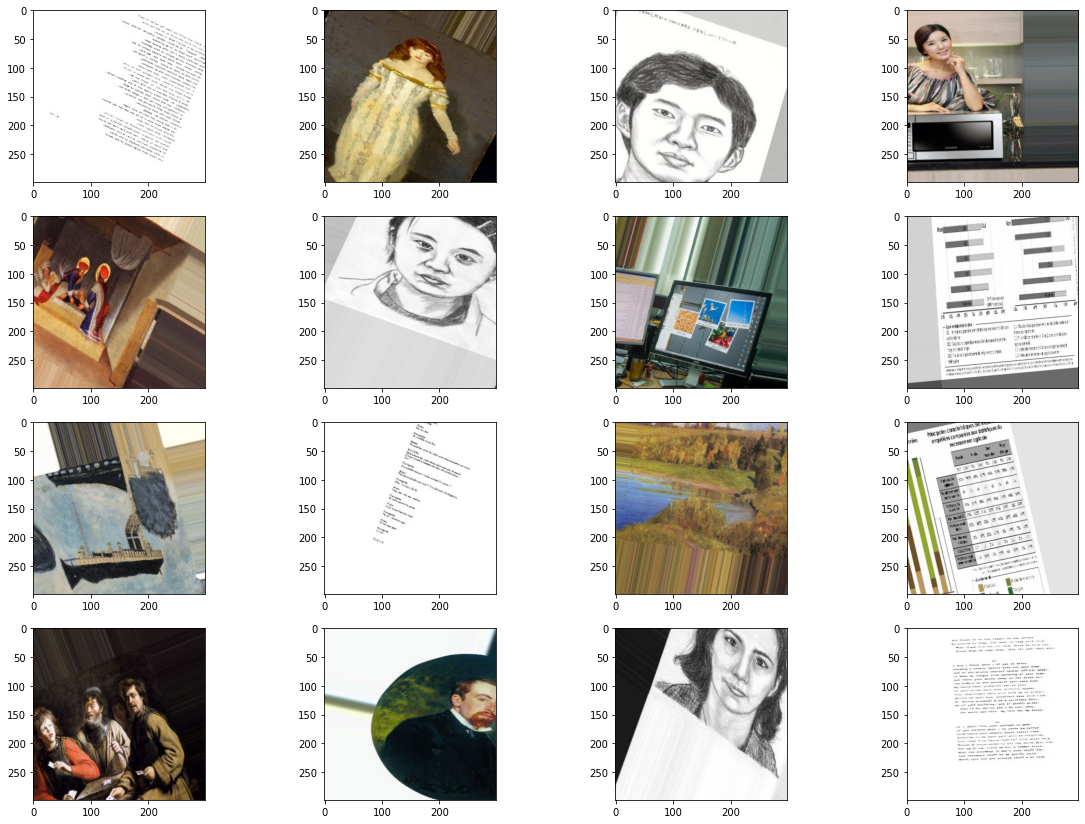

In [8]:
Npic = 16
fig = plt.figure(figsize=(20, 60))

for i in range(Npic):
  batch = image_classification_train.next()
  img_train = (batch[0]*255)
  ax = plt.subplot(Npic,4,i+1)
  ax = plt.imshow(img_train[0].astype('uint8'))

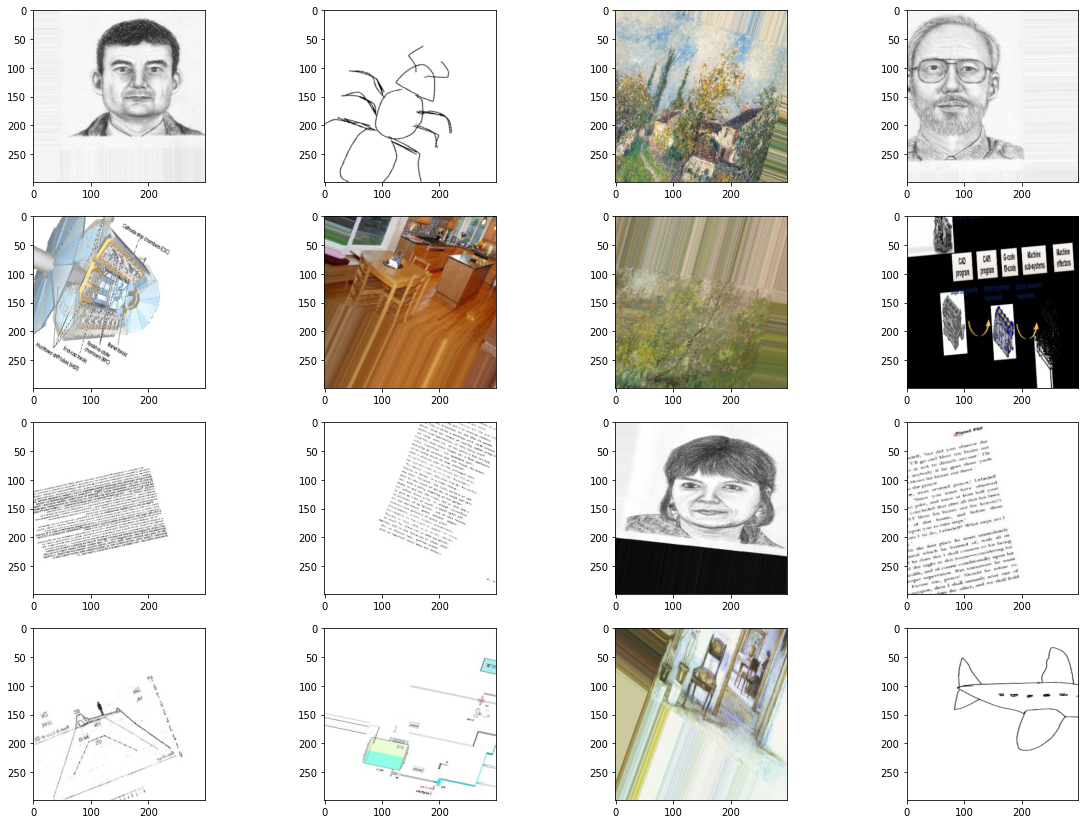

In [9]:
Npic = 16
fig = plt.figure(figsize=(20, 60))

for i in range(Npic):
  batch = image_classification_val.next()
  img_val = (batch[0]*255)
  ax = plt.subplot(Npic,4,i+1)
  ax = plt.imshow(img_val[0].astype('uint8'))

#2.) MODEL TRAINING

Optimizer, parameters

In [ ]:
import keras
import tensorflow
from tensorflow.keras.optimizers import Adam

In [ ]:
model.compile(optimizer=tensorflow.keras.optimizers.Adam(lr=0.000001),loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
EP = 20

print(image_classification_train.n,image_classification_train.batch_size)
print(image_classification_val.n,image_classification_val.batch_size)

step_size_train = (image_classification_train.n//image_classification_train.batch_size)
step_size_val = (image_classification_val.n//image_classification_val.batch_size)

print("train:",step_size_train,"val:",step_size_val)

3500 28
1500 12
train: 125 val: 125


Callback function

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stopper = EarlyStopping(monitor='loss', patience=3)

Training Model

In [ ]:
history = model.fit(
                            x=image_classification_train,
                            steps_per_epoch=step_size_train,
                            validation_data = image_classification_val,
                            validation_steps = step_size_val,
                            epochs=EP,
                            verbose = 1
                            ,callbacks=[early_stopper])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
125/125 [==============================] - 139s 1s/step - loss: 1.5108 - accuracy: 0.3889 - val_loss: 1.4364 - val_accuracy: 0.4840
Epoch 2/20
125/125 [==============================] - 126s 1s/step - loss: 1.3082 - accuracy: 0.6266 - val_loss: 1.2262 - val_accuracy: 0.6540
Epoch 3/20
125/125 [==============================] - 137s 1s/step - loss: 1.1197 - accuracy: 0.7477 - val_loss: 1.0367 - val_accuracy: 0.7667
Epoch 4/20
125/125 [==============================] - 126s 1s/step - loss: 0.9510 - accuracy: 0.8003 - val_loss: 0.8715 - val_accuracy: 0.8093
Epoch 5/20
125/125 [==============================] - 131s 1s/step - loss: 0.8174 - accuracy: 0.8303 - val_loss: 0.7407 - val_accuracy: 0.8487
Epoch 6/20
125/125 [==============================] - 137s 1s/step - loss: 0.6958 - accuracy: 0.8660 - val_loss: 0.6386 - val_accuracy: 0.8740
Epoch 7/20
125/125 [==============================] - 132s 1s/step - loss: 0.6094 - accuracy: 0.8829 - val_loss: 0.5626 - val_accuracy: 0.8973

Performance Visualization

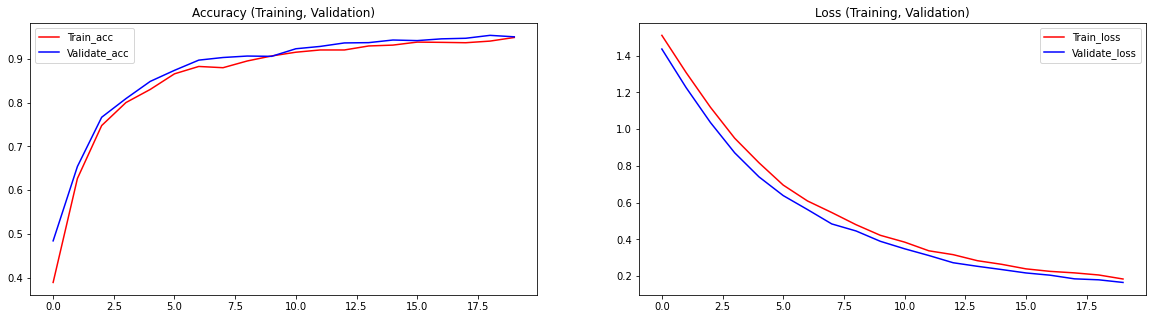

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

ax[0].set_title("Accuracy (Training, Validation)")
ax[0].plot(history.history["accuracy"],c ='red', label="Train_acc")
ax[0].plot(history.history["val_accuracy"],c ='blue', label="Validate_acc")
ax[0].legend(['Train_acc','Validate_acc'])

ax[1].set_title("Loss (Training, Validation)")
ax[1].plot(history.history['loss'],c ='red', label="Train_loss")
ax[1].plot(history.history['val_loss'],c ='blue', label="Validate_loss")
ax[1].legend(['Train_loss','Validate_loss'])

Model Testing

In [ ]:
testPath = "/content/drive/MyDrive/ColabNotebooks/Image_processing/imageclassification/test"

test_datagen= ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
                                                  testPath
                                                  ,class_mode="categorical"
                                                  ,target_size=(299, 299)
                                                  ,color_mode="rgb"
                                                  ,shuffle=False
                                                  ,seed=seed_value
                                                  ,batch_size=1)

Found 1500 images belonging to 5 classes.


In [ ]:
y_true = test_generator.classes
print(len(y_true))

1500


In [ ]:
import numpy as np

In [ ]:
test_generator.reset()
pred_prob = []

pred=model.predict_generator(test_generator)
for i in range(len(y_true)):
    pred_prob.append(np.array(pred[i]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  del sys.path[0]


Model Result Visualization

In [ ]:
from tensorflow.math import confusion_matrix
from sklearn.metrics import classification_report
import pandas as pd

In [ ]:
df_pred = pd.DataFrame(pred_prob)
df_class = df_pred.idxmax(axis=1)

In [ ]:
print(confusion_matrix(y_true, df_class))

tf.Tensor(
[[239  49  10   1   1]
 [ 11 284   5   0   0]
 [ 13  11 273   2   1]
 [  0   0  16 284   0]
 [  0   0   6   0 294]], shape=(5, 5), dtype=int32)


In [ ]:
print(classification_report(y_true, df_class))

              precision    recall  f1-score   support

           0       0.91      0.80      0.85       300
           1       0.83      0.95      0.88       300
           2       0.88      0.91      0.90       300
           3       0.99      0.95      0.97       300
           4       0.99      0.98      0.99       300

    accuracy                           0.92      1500
   macro avg       0.92      0.92      0.92      1500
weighted avg       0.92      0.92      0.92      1500



#3.) HYPERPARAMETER TUNING

start Hyperparameter

In [ ]:
import numpy as np
import pandas as pd
import cv2

from matplotlib import pyplot as plt
import keras
import tensorflow 
import keras_tuner as kt
from keras.preprocessing import image
from keras.layers import Dense,GlobalAveragePooling2D,Dropout
from tensorflow.keras.applications import InceptionV3,VGG16,MobileNetV2

from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,Adadelta,SGD

from tensorflow.keras import Model
from tensorflow.math import confusion_matrix
from sklearn.metrics import classification_report

from tensorflow.keras.callbacks import EarlyStopping

HyperParameter Tuning With Keras-Tuner

Load Img

In [ ]:
img_path = "imageclassification"

Define all parameter

In [ ]:
hyper_batch_size = [28,12]
input_shape = (224,224,3)

hyper_param = {
    "pretrain":["InceptionV3",
                "VGG16",
                "MobileNetV2"],
               
    "optimizer":["Adam","SGD","Adadelta"],
    "units":{"min_value":128, "max_value":512, "step":32},
    "lr": {"min_value":1e-4, "max_value":1e-2, "sampling":"log"},
    "loss": ['categorical_crossentropy',"categorical_hinge"]
}

In [ ]:
def get_all_datagen(batch_size):
  #define params
  rotation_range = 30
  width_shift_range = [0.1, 0.2, 0.3]
  height_shift_range = [0.1, 0.2, 0.3]
  shear_range = 0.3
  zoom_range = 0.2
  horizontal_flip = True
  seed_value = 20

  datagen=ImageDataGenerator( rescale=1./255,
                              rotation_range=rotation_range,
                              zoom_range=zoom_range,
                              width_shift_range=width_shift_range, 
                              height_shift_range=height_shift_range,
                              shear_range=shear_range, 
                              horizontal_flip=horizontal_flip,
                              fill_mode="nearest")

  image_classification_train = datagen.flow_from_directory(img_path+"/train/"
                                                          ,target_size=(224,224)
                                                          ,color_mode='rgb'
                                                          ,batch_size=batch_size[0]
                                                          ,class_mode='categorical'
                                                          ,seed = seed_value
                                                          ,shuffle=True)
  
  image_classification_val = datagen.flow_from_directory(img_path+'/validate/'
                                                        ,target_size=(224,224), color_mode='rgb',batch_size=batch_size[1]
                                                        ,class_mode='categorical', seed = seed_value,shuffle=True)
  
  return image_classification_train,image_classification_val

Create Hypermodel

In [ ]:
def build_model(hp):
  base_model_choice=hp.Choice("pretrain",hyper_param["pretrain"])
  if base_model_choice == "InceptionV3":
    base_model = InceptionV3(weights='imagenet',include_top=False,input_shape=input_shape)
  if base_model_choice == "VGG16":
    base_model = VGG16(weights='imagenet',include_top=False,input_shape=input_shape)
  if base_model_choice == "MobileNetV2":
    base_model = MobileNetV2(weights='imagenet',include_top=False,input_shape=input_shape)


  x=base_model.output
  x=GlobalAveragePooling2D()(x)

  x=Dense(hp.Int("units",min_value=hyper_param["units"]["min_value"], max_value=hyper_param["units"]["max_value"],step=hyper_param["units"]["step"]),activation="relu")(x)
  if hp.Boolean("dropout"):
    x = Dropout(rate=0.25)(x)

  preds=Dense(5,activation='softmax')(x)
  model= Model(inputs=base_model.input,outputs=preds)

  learning_rate = hp.Float("lr", min_value=hyper_param["lr"]["min_value"], max_value=hyper_param["lr"]["max_value"], sampling=hyper_param["lr"]["sampling"])
  optimizer_choice = hp.Choice("optimizer",hyper_param["optimizer"])
  if optimizer_choice == "Adam":
    optimizer = Adam(learning_rate=learning_rate)  
  if optimizer_choice == "SGD":
    optimizer = SGD(learning_rate=learning_rate)
  if optimizer_choice == "Adadelta":
    optimizer = Adadelta(learning_rate=learning_rate)

      

  model.compile(optimizer=optimizer ,loss=hp.Choice("loss",hyper_param["loss"]),metrics=['accuracy'])
  
  return model

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopper = EarlyStopping(monitor='loss', patience=3)

In [ ]:
image_classification_train,image_classification_val = get_all_datagen(hyper_batch_size)

tuner = kt.RandomSearch(
  hypermodel=build_model,
  objective="val_accuracy",
  max_trials=30,
  executions_per_trial=2,
  overwrite=True,
  directory="/content/drive/MyDrive/ColabNotebooks/Image_processing/Hyper_Result",
  project_name="Hyperparam_Tuning_Test",
)
tuner.search(image_classification_train, epochs=10
             , validation_data=image_classification_val , callbacks=[early_stopper] )

Trial 30 Complete [00h 19m 56s]
val_accuracy: 0.9619999825954437

Best val_accuracy So Far: 0.9646666646003723
Total elapsed time: 09h 47m 38s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 6
pretrain (Choice)
{'default': 'InceptionV3', 'conditions': [], 'values': ['InceptionV3', 'VGG16', 'MobileNetV2'], 'ordered': False}
units (Int)
{'default': None, 'conditions': [], 'min_value': 128, 'max_value': 512, 'step': 32, 'sampling': None}
dropout (Boolean)
{'default': False, 'conditions': []}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}
optimizer (Choice)
{'default': 'Adam', 'conditions': [], 'values': ['Adam', 'SGD', 'Adadelta'], 'ordered': False}
loss (Choice)
{'default': 'categorical_crossentropy', 'conditions': [], 'values': ['categorical_crossentropy', 'categorical_hinge'], 'ordered': False}


In [ ]:
tuner.results_summary()

Results summary
Results in /content/drive/MyDrive/ColabNotebooks/Image_processing/Hyper_Result\Hyperparam_Tuning_Test
Showing 10 best trials
Trial summary
Hyperparameters:
pretrain: InceptionV3
units: 416
dropout: True
lr: 0.003755703811449314
optimizer: SGD
loss: categorical_crossentropy
Score: 0.9646666646003723
Trial summary
Hyperparameters:
pretrain: InceptionV3
units: 256
dropout: False
lr: 0.005366151301172358
optimizer: SGD
loss: categorical_hinge
Score: 0.9619999825954437
Trial summary
Hyperparameters:
pretrain: InceptionV3
units: 128
dropout: False
lr: 0.007914514851509392
optimizer: Adadelta
loss: categorical_hinge
Score: 0.9556666910648346
Trial summary
Hyperparameters:
pretrain: InceptionV3
units: 352
dropout: True
lr: 0.005387041595149855
optimizer: Adadelta
loss: categorical_hinge
Score: 0.9413333237171173
Trial summary
Hyperparameters:
pretrain: VGG16
units: 480
dropout: True
lr: 0.005666324070487912
optimizer: SGD
loss: categorical_crossentropy
Score: 0.9283333420753479

In [ ]:

best_hps = tuner.get_best_hyperparameters(3)

model_ = build_model(best_hps[0])


In [ ]:
model_.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 111, 111, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 111, 111, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  )                                                           

In [ ]:
#save Top 3 Model
model = build_model(best_hps[0])
model.save('/content/drive/MyDrive/ColabNotebooks/Image_processing/save_top3_best_model/model1.h5')
model2 = build_model(best_hps[1])
model2.save('/content/drive/MyDrive/ColabNotebooks/Image_processing/save_top3_best_model/model2.h5')
model3 = build_model(best_hps[2])
model3.save('/content/drive/MyDrive/ColabNotebooks/Image_processing/save_top3_best_model/model3.h5')

#4.) RE-TRAINING MODEL


Load New Model

In [ ]:
new_model = tensorflow.keras.models.load_model('/content/drive/MyDrive/ColabNotebooks/Image_processing/save_top3_best_model/model1.h5')

In [ ]:
new_model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_564 (Conv2D)            (None, 111, 111, 32  864         ['input_7[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_564 (Batch  (None, 111, 111, 32  96         ['conv2d_564[0][0]']             
 Normalization)                 )                                                           

Create ImageDataGenerator (Train) and Fit 

In [ ]:
rotation_range = 30
width_shift_range = [0.1, 0.2, 0.3]
height_shift_range = [0.1, 0.2, 0.3]
shear_range = 0.3
zoom_range = 0.2
horizontal_flip = True

In [ ]:
datagen=ImageDataGenerator( rescale=1./255,
                            rotation_range=rotation_range,
                            zoom_range=zoom_range,
                            width_shift_range=width_shift_range, 
                            height_shift_range=height_shift_range,
                            shear_range=shear_range, 
                            horizontal_flip=horizontal_flip,
                            fill_mode="nearest")
seed_value = 20

Data Preprocessing

In [ ]:
image_classification_train = datagen.flow_from_directory('/content/drive/MyDrive/ColabNotebooks/Image_processing/imageclassification/train/'
                                                                                        ,target_size=(299,299)
                                                                                        , color_mode='rgb'
                                                                                        ,batch_size=28
                                                                                        ,class_mode='categorical'
                                                                                        , seed = seed_value
                                                                                        ,shuffle=True)

Found 3500 images belonging to 5 classes.


In [ ]:
image_classification_val = datagen.flow_from_directory('/content/drive/MyDrive/ColabNotebooks/Image_processing/imageclassification/validate/', 
                                          target_size=(299,299), color_mode='rgb',batch_size=12,class_mode='categorical', seed = seed_value,shuffle=True)

Found 1500 images belonging to 5 classes.


Optimizer, parameters

In [ ]:
EP = 20

print(image_classification_train.n,image_classification_train.batch_size)
print(image_classification_val.n,image_classification_val.batch_size)

step_size_train = (image_classification_train.n//image_classification_train.batch_size)
step_size_val = (image_classification_val.n//image_classification_val.batch_size)

print("train:",step_size_train,"val:",step_size_val)

3500 28
1500 12
train: 125 val: 125


In [ ]:
early_stopper = EarlyStopping(monitor='loss', patience=3)

In [ ]:
history = new_model.fit(
                            x=image_classification_train,
                            steps_per_epoch=step_size_train,
                            validation_data = image_classification_val,
                            validation_steps = step_size_val,
                            epochs=EP,
                            verbose = 1
                            ,callbacks=[early_stopper])

Epoch 1/20
125/125 [==============================] - 1147s 9s/step - loss: 0.7786 - accuracy: 0.7451 - val_loss: 0.4099 - val_accuracy: 0.8873
Epoch 2/20
125/125 [==============================] - 167s 1s/step - loss: 0.3084 - accuracy: 0.9126 - val_loss: 0.2029 - val_accuracy: 0.9407
Epoch 3/20
125/125 [==============================] - 165s 1s/step - loss: 0.2186 - accuracy: 0.9337 - val_loss: 0.1492 - val_accuracy: 0.9500
Epoch 4/20
125/125 [==============================] - 162s 1s/step - loss: 0.1633 - accuracy: 0.9506 - val_loss: 0.1195 - val_accuracy: 0.9627
Epoch 5/20
125/125 [==============================] - 161s 1s/step - loss: 0.1251 - accuracy: 0.9606 - val_loss: 0.0951 - val_accuracy: 0.9707
Epoch 6/20
125/125 [==============================] - 160s 1s/step - loss: 0.1123 - accuracy: 0.9606 - val_loss: 0.0825 - val_accuracy: 0.9760
Epoch 7/20
125/125 [==============================] - 160s 1s/step - loss: 0.0957 - accuracy: 0.9694 - val_loss: 0.0789 - val_accuracy: 0.973

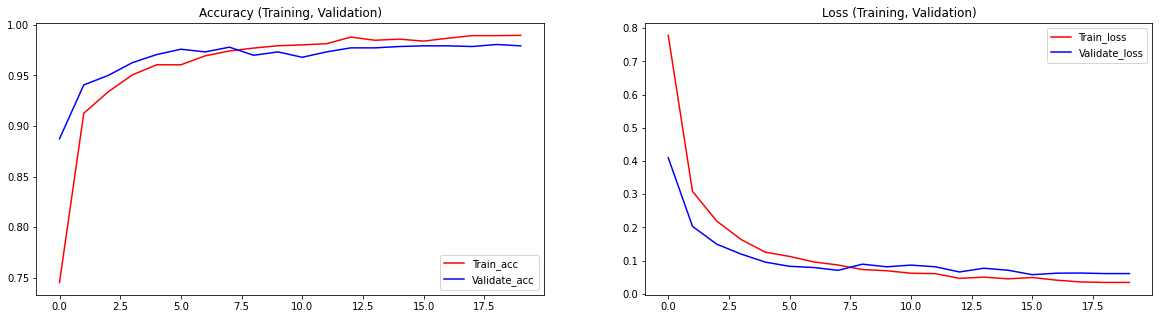

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

ax[0].set_title("Accuracy (Training, Validation)")
ax[0].plot(history.history["accuracy"],c ='red', label="Train_acc")
ax[0].plot(history.history["val_accuracy"],c ='blue', label="Validate_acc")
ax[0].legend(['Train_acc','Validate_acc'])

ax[1].set_title("Loss (Training, Validation)")
ax[1].plot(history.history['loss'],c ='red', label="Train_loss")
ax[1].plot(history.history['val_loss'],c ='blue', label="Validate_loss")
ax[1].legend(['Train_loss','Validate_loss'])

Test New Model

In [ ]:
seed_value = 12345
testPath = "/content/drive/MyDrive/ColabNotebooks/Image_processing/imageclassification/test"

test_datagen= ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
                                                  testPath
                                                  ,class_mode="categorical"
                                                  ,target_size=(299, 299)
                                                  ,color_mode="rgb"
                                                  ,shuffle=False
                                                  ,seed=seed_value
                                                  ,batch_size=1)

Found 1500 images belonging to 5 classes.


In [ ]:
y_true = test_generator.classes
print(len(y_true))

1500


In [ ]:
test_generator.reset()
pred_prob = []

pred=new_model.predict_generator(test_generator)
for i in range(len(y_true)):
    pred_prob.append(np.array(pred[i]))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """


In [ ]:
df_pred = pd.DataFrame(pred_prob)
df_class = df_pred.idxmax(axis=1)

In [ ]:
print(confusion_matrix(y_true, df_class))

tf.Tensor(
[[282   8  10   0   0]
 [  3 293   4   0   0]
 [  4   3 292   1   0]
 [  0   0   0 300   0]
 [  0   0   3   0 297]], shape=(5, 5), dtype=int32)


In [ ]:
print(classification_report(y_true, df_class))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       300
           1       0.96      0.98      0.97       300
           2       0.94      0.97      0.96       300
           3       1.00      1.00      1.00       300
           4       1.00      0.99      0.99       300

    accuracy                           0.98      1500
   macro avg       0.98      0.98      0.98      1500
weighted avg       0.98      0.98      0.98      1500



#EXTRA

------------------------- Presetation ----------------------------------

In [ ]:
import numpy as np
import pandas as pd
import cv2

from matplotlib import pyplot as plt
import keras
import tensorflow 
from keras.preprocessing import image

#from keras.applications.inceptionv3 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras import Model
from tensorflow.math import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
present_model = tensorflow.keras.models.load_model('present_model.h5')

In [ ]:
seed_value = 12345
# Initial test generator
present_Path = "Presentation_photo"

#create image test generator
present_datagen= ImageDataGenerator(rescale=1./255)

present_generator = present_datagen.flow_from_directory(
                                                  present_Path
                                                  ,class_mode="categorical"
                                                  ,target_size=(224, 224)
                                                  ,color_mode="rgb"
                                                  ,shuffle=False
                                                  ,seed=seed_value
                                                  ,batch_size=1)

Found 10 images belonging to 5 classes.


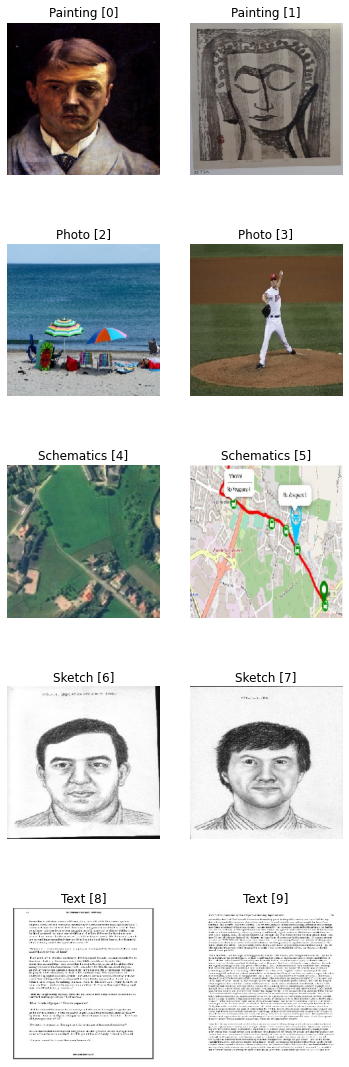

In [ ]:
name_class = ["Painting","Photo","Schematics","Sketch","Text"]

#View Training Images
Npic = 10
fig = plt.figure(figsize=(6, 40))
image = []

for i in range(Npic):
  batch = present_generator.next()
  img_train = (batch[0]*255)
  image.append(img_train)
  ax = plt.subplot(Npic,2,i+1)
  ax = plt.axis('off')
  ax = plt.title(name_class[i//2]+" ["+str(i)+"]")
  ax = plt.imshow(img_train[0].astype('uint8'))



In [ ]:
# test_image = cv2.cvtColor(cv2.imread('k.png'),cv2.COLOR_BGR2RGB)
# test_image = cv2.resize(test_image,dsize=(224,224))
# test_image = np.array([test_image*1./255])
# plt.imshow(test_image[0])

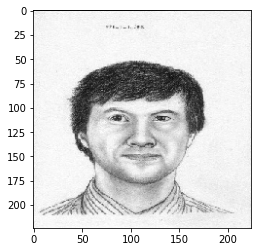

In [ ]:
test_image = present_generator[7][0]
plt.imshow(test_image[0])

In [ ]:
pred = present_model.predict(test_image)
print()
print("class => " + name_class[pred.argmax()])


class => Photo
